# NCR Analysis

Script to find NCR parts and reasons by department for a month

In [2]:
month = "January"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [4]:
months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_num = months_list.index(month)+1

In [5]:
#Load and clean data
#select only rows at WIP locations
month_ncrs = pd.read_csv(month +" NCRs.csv")
month_ncrs.columns = ["Number", "Location", "Date", "Source", "Type", "Nonconformance", "Disp", "Closed", "Disp Entered By", "Product"] #rename cols
month_ncrs = month_ncrs[["Location", "Date", "Type", "Nonconformance", "Disp", "Disp Entered By", "Product"]]    #grab only columns needed
#month_ncrs["Location 1"]= month_ncrs["Location"].astype(str).str.split(" ").str[0]    #createnew column to clarify location
month_ncrs["Part Num"] = month_ncrs["Product"].astype(str).str.split(" ").str[0]      #create new column to separate out part number
wip_locations = ["Area1WIP", "Area2WIP", "Area3WIP", "Area4WIP", "Area5WIP", "Area6WIP", "Area7WIP"]
wip_ncrs = month_ncrs[month_ncrs["Location"].isin(wip_locations)]       #select rows at wip locations only

In [6]:
#set colors for graphs
c0="blue"
fcolor = "whitesmoke"
c1 = "limegreen"

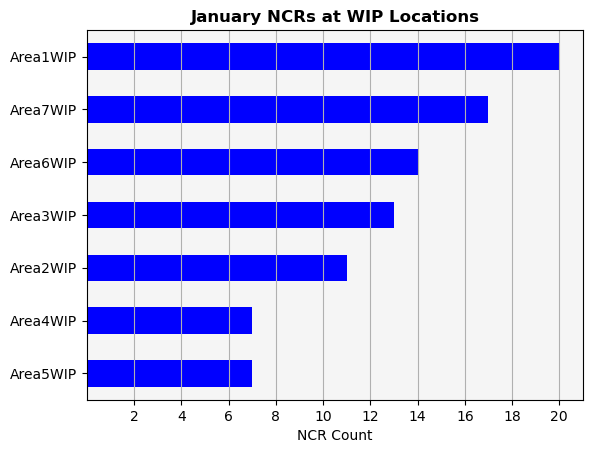

In [7]:
#plot NCRs by department
fig, ax = plt.subplots()
ax.set_facecolor(fcolor)

wip_ncrs["Location"].value_counts().sort_values(ascending = True).plot(kind = "barh", color = c0)
plt.xticks(list(range(2, wip_ncrs["Location"].value_counts().max()+2, 2)))
plt.grid(axis = "x")
plt.title( month +" NCRs at WIP Locations", fontweight = 'bold')
plt.ylabel("")
plt.xlabel("NCR Count")
plt.savefig(month + " NCRs by Location", bbox_inches = "tight")
plt.show()


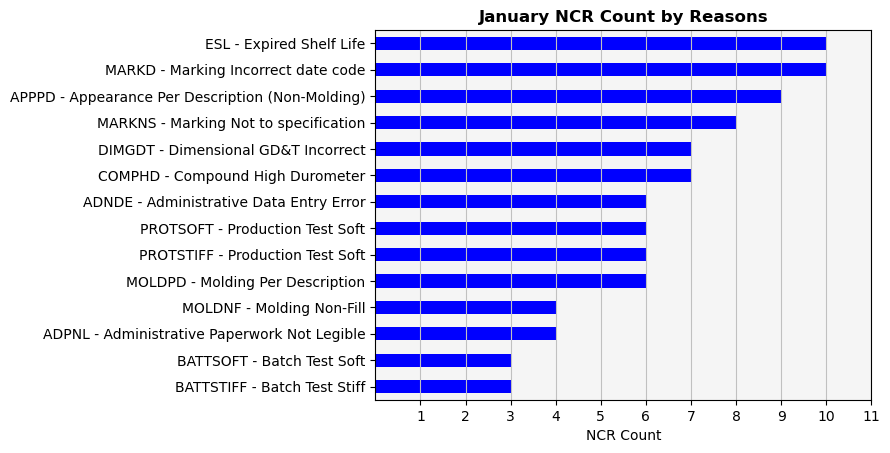

In [8]:
fig, ax = plt.subplots()
ax.set_facecolor(fcolor)
wip_ncrs["Type"].value_counts().sort_values().plot(kind = "barh", color = c0)
plt.xticks(list(range(1, wip_ncrs["Type"].value_counts().max()+2 )))
plt.grid(axis = "x", color = "silver")
plt.ylabel("")
plt.xlabel("NCR Count")
plt.title(month + " NCR Count by Reasons", fontweight = 'bold')
plt.savefig(month + " NCRs by Reason", bbox_inches = "tight")
plt.show()


In [9]:
#helper functions
def split_by_dept(df, dept): 
    #create df for a specific department
    new_df = df[df["Location"] == dept]
    return new_df

def find_counts(df, col):
    #get counts of ncrs by part number
    new_df = df.groupby(col)["Disp"].count().sort_values(ascending = False)
    new_df.columns = ["Part Num", "NCR Count"]
    return new_df

def plot_ncrs(df):
    #crate bar chart of ncrs
    if len(df) >0: 
        fig, ax = plt.subplots()
        ax.set_facecolor(fcolor)
        df.plot(kind = "barh", color = c0)
        plt.xticks(list(range(1, df.max()+1)))
        plt.grid(axis = "x")

def pareto_plot(df):
    #create pareto plot for ncr types
    if len(df)>0:
        #c0="blue"
        #c1 = "limegreen"
        df =df.reset_index()
        df.columns = ["Type", "Count"]
        df["cumpercentage"] = df["Count"].cumsum()/df["Count"].sum()*100
        fig, ax = plt.subplots()
        ax.set_facecolor(fcolor)
        ax.bar(df["Type"], df["Count"], color =c0)
        plt.xticks(rotation = 45, ha = "right")
        ax.set_ylabel("NCR Count", color = c0)
        ax2= ax.twinx()
        ax2.plot(df["Type"], df["cumpercentage"], color = c1, marker = "D", ms = 7)
        ax2.yaxis.set_major_formatter(PercentFormatter())
        ax.tick_params(axis = "y", colors =c0)
        ax2.tick_params(axis = "y", colors = c1)
        ax2.set_ylabel("% of NCRs", color = c1)
        ax2.set_ylim([0, 110])

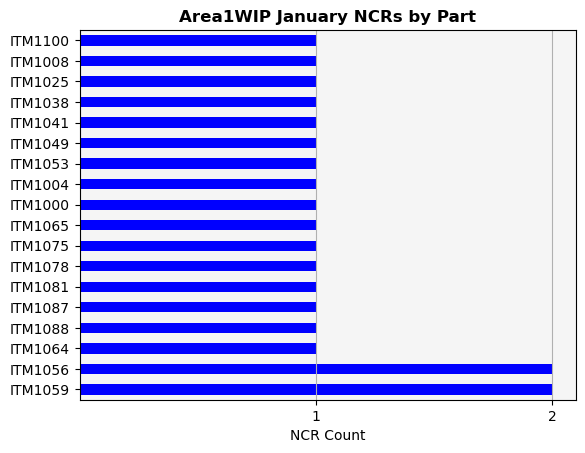

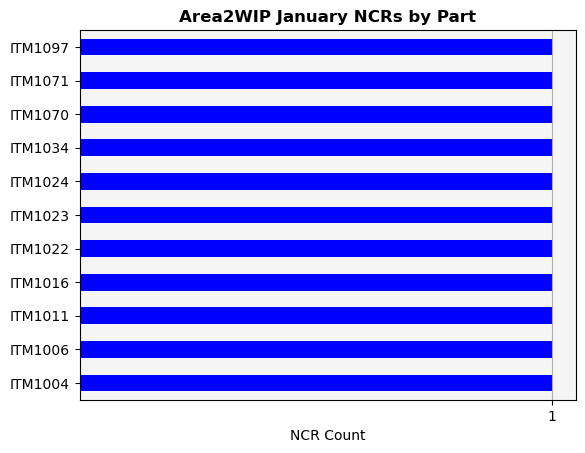

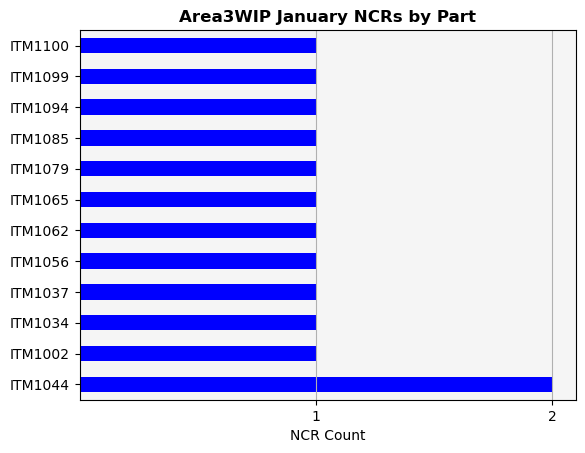

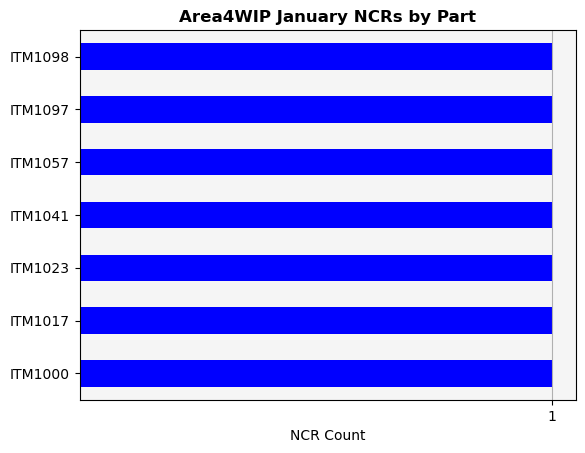

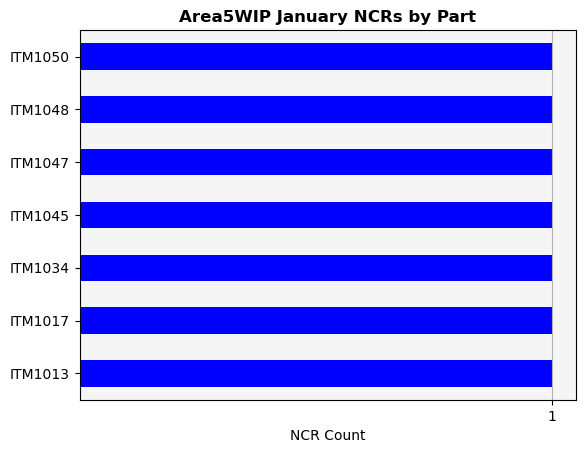

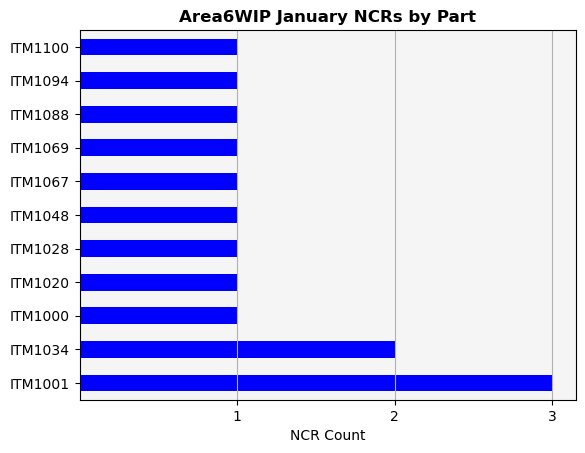

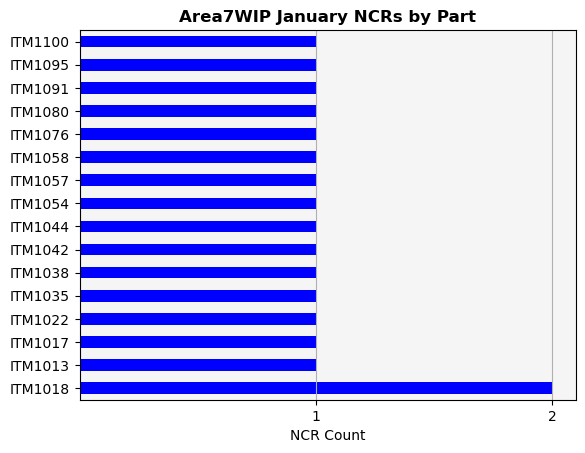

In [10]:
#plot ncr count by part numbers for each department
for location in wip_locations:
    df = find_counts(split_by_dept(wip_ncrs, location), "Part Num")
    if len(df)> 0: 
        plot_ncrs(df)
        plt.xlabel("NCR Count")
        plt.ylabel("")
        plt.title( location +" " + month+" NCRs by Part", fontweight = "bold")
        plt.savefig(location +" " + month+" NCRs by Part", bbox_inches = "tight")
        plt.show()

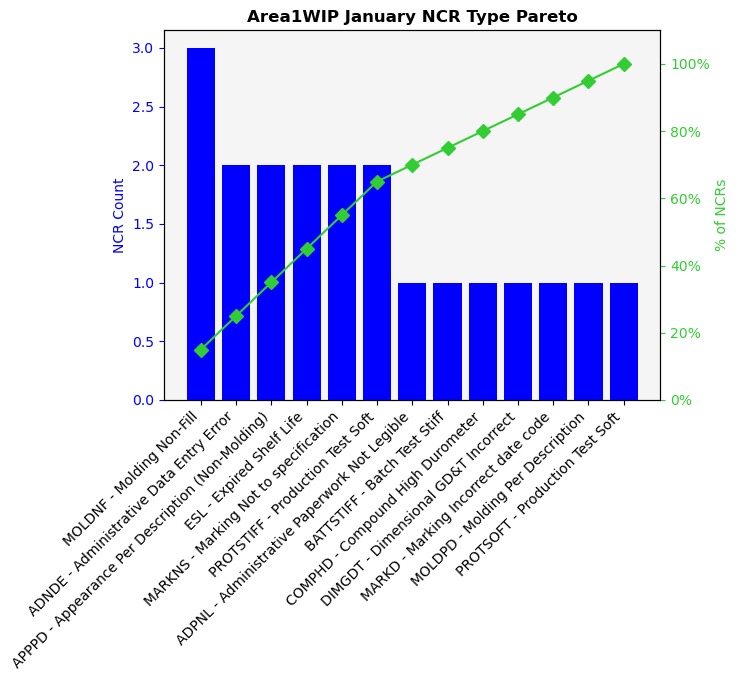

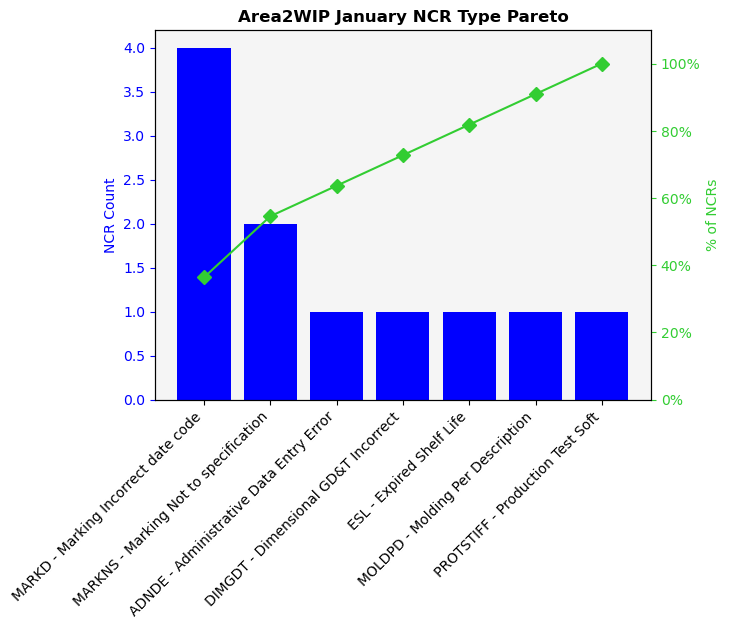

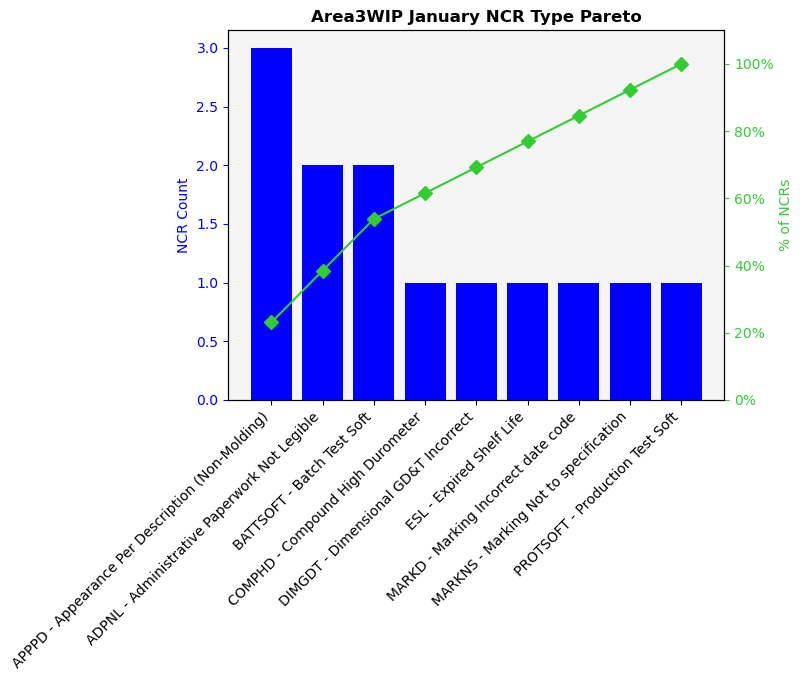

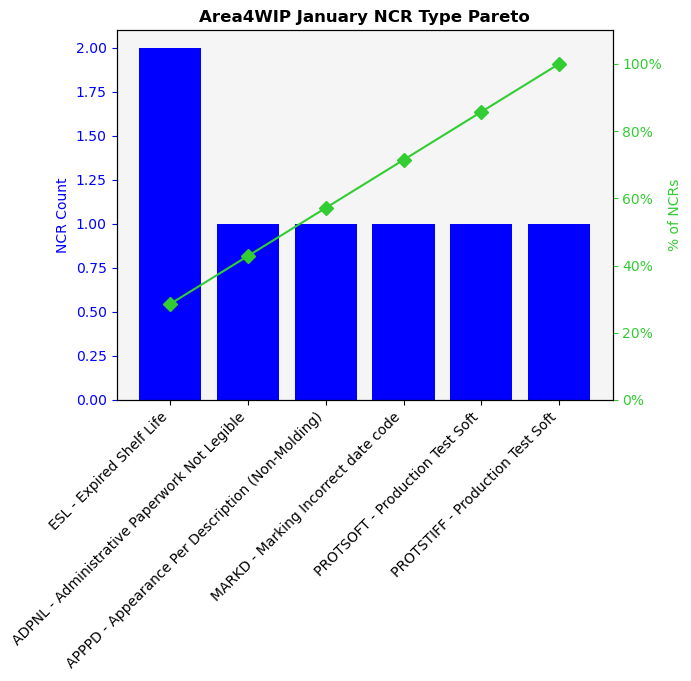

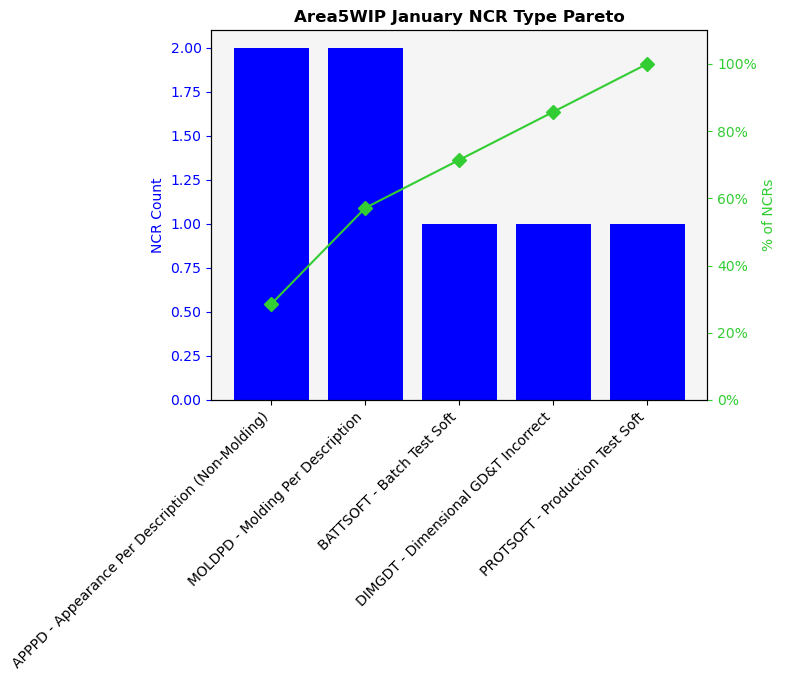

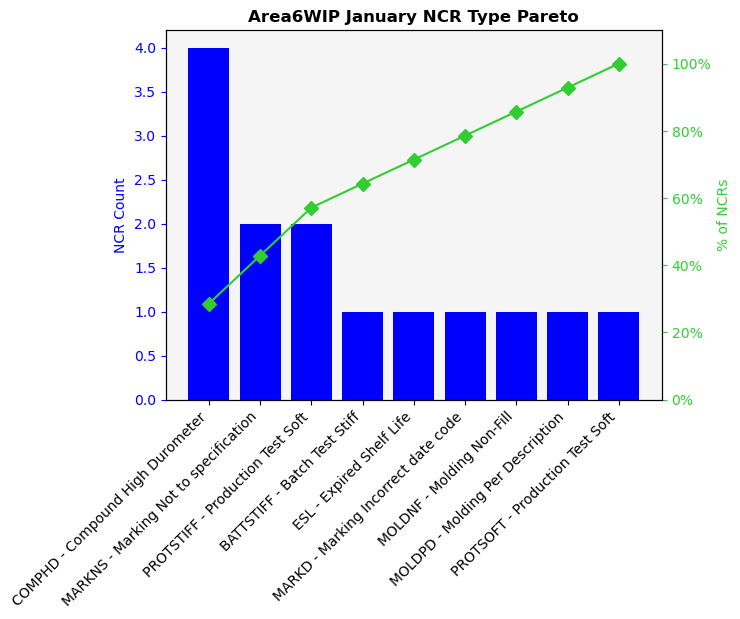

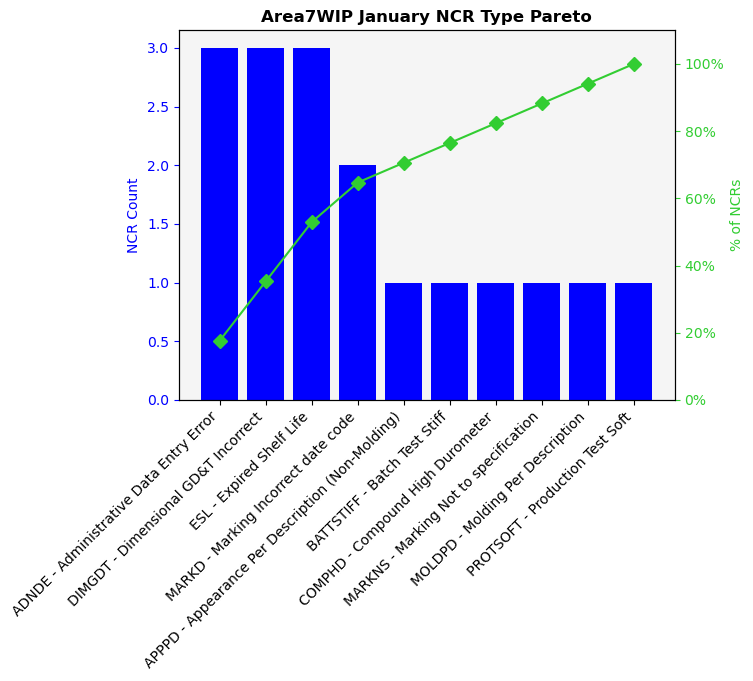

In [11]:
#plot NCR Reasons pareto for each department
for location in wip_locations:  
    df = find_counts(split_by_dept(wip_ncrs, location), "Type")
    if len(df)>0: 
        pareto_plot(df)
        plt.title(location + " " + month + " NCR Type Pareto", fontweight = 'bold')
        plt.savefig(location + " " + month + " NCR Type Pareto", bbox_inches = "tight")
        plt.show()
        df=df.reset_index()
        df.columns = ["Type", "Count"]
        df.sort_values(by=["Count", "Type"], ascending = [False, True])
        df["cumpercentage"] = round(df["Count"].cumsum()/df["Count"].sum()*100, 0)